# Assignment 1

## Feature Extraction:
---

In [15]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import linalg as LA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### First Loading data B:

In [36]:
url = "D:/UW MASc/ECE 657A  Data and Knowledge Modeling and Analys/Assignment/Assignment 1/DataB.csv "
df = pd.read_csv(url)

In [37]:
df.drop('Unnamed: 0',axis=1).head(10)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
1,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
2,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
3,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
4,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0
5,0,0,1,5,0,5,2,4,3,2,...,4,4,5,4,1,1,1,1,1,0
6,1,3,3,5,3,2,4,4,2,1,...,2,2,2,3,5,2,4,0,1,0
7,3,3,0,5,2,1,2,5,3,0,...,2,1,3,2,2,4,2,1,5,0
8,5,0,3,3,1,3,0,0,2,3,...,4,3,0,1,2,3,5,1,2,0
9,5,5,4,5,3,1,0,0,4,1,...,3,1,4,2,0,3,1,4,1,0


---

### Computing the Eignevectors and Eigenvalues of the Covariance Matrix

In [18]:
x=df.loc[:,'fea.1':'fea.784'].values 
mat=np.matrix(x)
mat_cov=np.cov(mat, rowvar=False, bias=True) #computing the covariance matrix
eigenvalues, eigenvector = LA.eig(mat_cov) #computing the eigenvalues and eigenvectors
eigvalues = pd.DataFrame(eigenvalues, index = range(1,785), columns = ['Eigenvalues'])
eigvalues.sort_values(by='Eigenvalues', ascending=False, inplace=True)
eigvector=pd.DataFrame(eigenvector)

---

### PCA Projection

In [19]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'
                          ,'principal component 4','principal component 5','principal component 6'])
principalDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,1069.166309,-513.973628,-139.244523,-878.386443,-387.876415,-335.326497
1,1099.176083,-570.842959,-67.313064,-839.379717,-345.575938,-530.806013
2,673.201379,-167.376654,480.987633,-83.821420,-1036.830970,76.585973
3,1010.903333,-187.043521,506.352981,-426.446977,-901.897476,73.722314
4,1692.970829,-633.370261,-521.943417,-367.352293,6.909753,-601.932558
5,1341.694304,-536.769074,-578.487615,-246.422398,577.920262,140.293247
6,1217.832628,-521.313660,-116.357368,-240.554736,-680.639588,-502.127202
7,226.761134,-457.324422,-284.321770,-128.611996,1016.996631,-86.943108
8,1219.222300,-479.274218,8.020748,521.171557,-722.012456,196.029302
9,900.753262,-548.126777,30.260319,-46.966111,-761.671173,-435.396681


---

### Plotting a 2D Representation of the Data Based on the First and Second Princpal Components:

In [20]:
finalDf = pd.concat([principalDf, df[['gnd']]], axis = 1)
finalDf2=finalDf.drop(['principal component 3','principal component 4','principal component 5','principal component 6'],axis=1)
finalDf2.head(5)

,principal component 1,principal component 2,gnd
0,1069.166309,-513.973628,0
1,1099.176083,-570.842959,0
2,673.201379,-167.376654,0
3,1010.903333,-187.043521,0
4,1692.970829,-633.370261,0


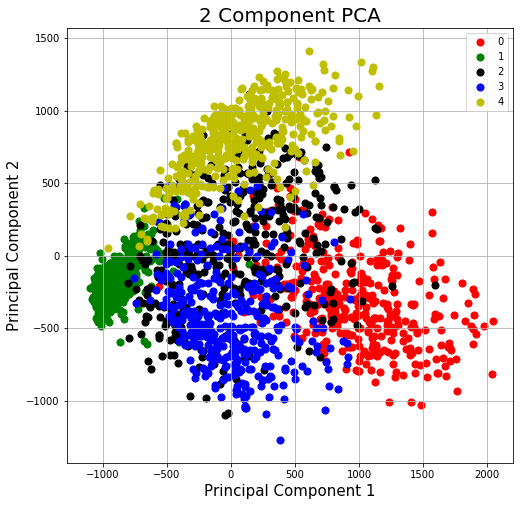

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


gnds = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'K', 'b', 'y']
for gnd, color in zip(gnds,colors):
    indicesToKeep = finalDf2['gnd'] == gnd
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(gnds)
ax.grid()

Although the classes overlap they are separated to some extent.
The variance retained by using the 1st and 2nd Principal Components (where 1 means all the variance is retained):

In [22]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.2208652726401908

---

### Plotting a 2D Representation of the Data Based on the 5th and 6th Princpal Components:

In [23]:
finalDf6=finalDf.drop(['principal component 1','principal component 2','principal component 3','principal component 4'],axis=1)
finalDf6.head(5)

,principal component 5,principal component 6,gnd
0,-387.876415,-335.326497,0
1,-345.575938,-530.806013,0
2,-1036.830970,76.585973,0
3,-901.897476,73.722314,0
4,6.909753,-601.932558,0


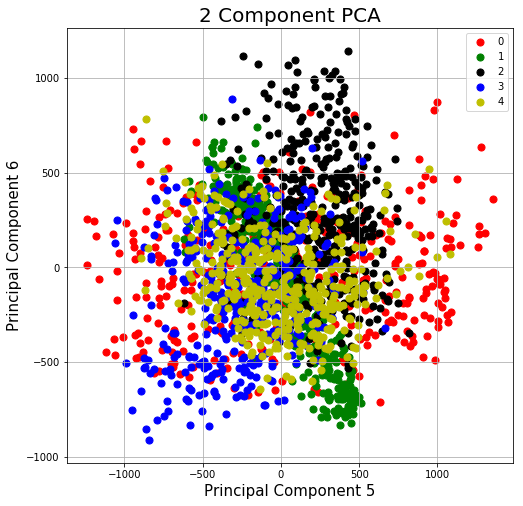

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 5', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


gnds = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'K', 'b', 'y']
for gnd, color in zip(gnds,colors):
    indicesToKeep = finalDf6['gnd'] == gnd
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 5']
               , finalDf.loc[indicesToKeep, 'principal component 6']
               , c = color
               , s = 50)
ax.legend(gnds)
ax.grid()

Using the 5th and 6th Principal Components to plot the data, one can realize that the variance decreased in comparison to 1st and 2nd Principal Component. In addition, the classes' data points overlapped even more and they are not well separated. The variance retained by using the 5th and 6th Principal Components (where 1 means all the variance is retained):


In [25]:
pca.explained_variance_ratio_[4]+pca.explained_variance_ratio_[5]

0.08913278510209191

---

### Using the Naive Bayes Classifier to Classify 8 Sets of Dimensionality Reduced Data:
Note that the Naive Bayes Classifier used assumes that each feature is independent of the other features and follows Gaussian Distribution and 

In [39]:
pcaVar=[]
gnbErr=[]

In [40]:
ser=(2,4,10,30,60,200,500,784)
gnb = GaussianNB()
for i in ser:
         X_train, X_test = train_test_split(df.drop('Unnamed: 0',axis=1), test_size=0.3)
         pca = PCA(n_components=i)
         X_train_PCA = pca.fit_transform(X_train.drop('gnd',axis=1).values)
         X_test_PCA=pca.transform(X_test.drop('gnd',axis=1).values)
         gnb.fit(X_train_PCA, X_train['gnd'])
         y_pred = gnb.predict(X_test_PCA)
         err=100*((X_test['gnd'] != y_pred).sum()/X_test.shape[0])
         var=100*pca.explained_variance_ratio_.sum()
         pcaVar.append(var)
         gnbErr.append(err)

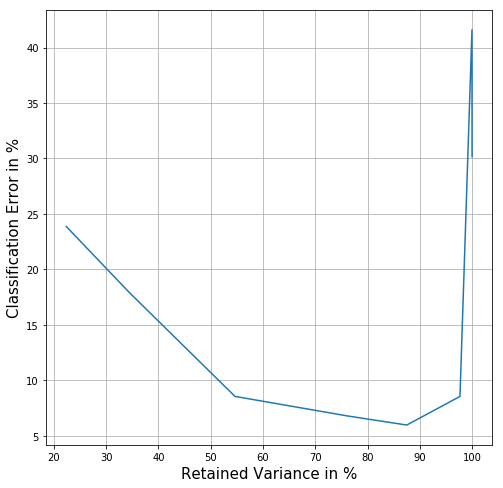

([22.36156505388952,
  34.457023090411866,
  54.64587287071121,
  76.33494517102038,
  87.51066555532037,
  97.68855598496685,
  99.98230114098354,
  99.99999999999999],
 [23.870967741935484,
  17.903225806451616,
  8.548387096774194,
  6.774193548387098,
  5.967741935483871,
  8.548387096774194,
  41.612903225806456,
  30.161290322580648])

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
plt.plot(pcaVar,gnbErr)
plt.ylabel('Classification Error in %',fontsize = 15)
plt.xlabel('Retained Variance in %',fontsize = 15)
ax.grid()
plt.show()
(pcaVar,gnbErr)


The graph shows that the lowest classification error occurs when using 10 to 200 Principal Components with a retained variance of 54.6% and 97.7%. Using more Principal Components resulted in an increase in the error which could be the result of having too many features for our small number of samples. As a common practice, we should have #samples= 10*#Features (so having up to 200 features for our 2066 samples can be tolerated (classification error of 8.5%)

---

### Using Linear Discriminant Analysis (LDA):

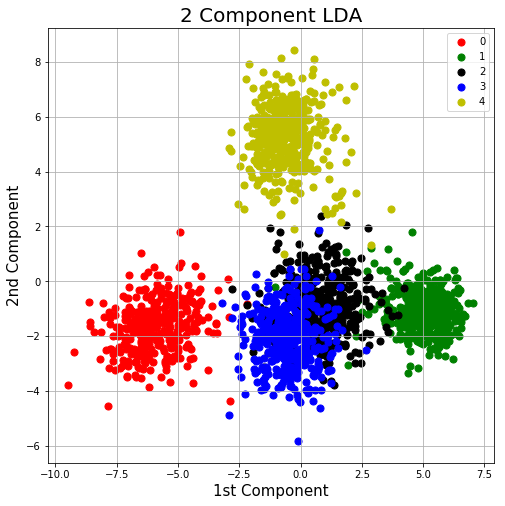

In [60]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(x,df['gnd'].values).transform(x)
LDAreduced=pd.DataFrame(data = X_r2, columns =['1st Component', '2nd Component'])
LDAreduced=pd.concat([LDAreduced, df[['gnd']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('1st Component', fontsize = 15)
ax.set_ylabel('2nd Component', fontsize = 15)
ax.set_title('2 Component LDA', fontsize = 20)


gnds = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'K', 'b', 'y']
for gnd, color in zip(gnds,colors):
    indicesToKeep = LDAreduced['gnd'] == gnd
    ax.scatter(LDAreduced.loc[indicesToKeep, '1st Component']
               , LDAreduced.loc[indicesToKeep, '2nd Component']
               , c = color
               , s = 50)
ax.legend(gnds)
ax.grid()

In comparison with PCA, when using LDA the classes separation is significantly appearent and the overlapping between classes has been minimized. 